# Loaded Dice
## Who Can You Trust?
![image info](./loaded_die.jpg)

You've grown tired of losing games with you friends and have started to suspect that some of them might be **cheating** with their dice.
It's time to find out once and for all if your *paranoia* is well founded!

We start by importing the libraries we will need to explore our data.

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
# from scipy.stats import bartlett

We define a function that will let us generate dice rolling trials for arbitrarily-sided dice.

In [5]:
def roll_dice(n_dice=1, n_trials=1, n_sides=20):
    return np.random.randint(1, n_sides+1, (n_dice, n_trials))

We define a dictionary within which we will store the trials for each of our friends.

In [18]:
rolls = {}
names = ["Meera", "Muhammad", "George", "Ada", "Miguel"]
n_trials = 20000

The following snippet generates the dice rolling trials for each of our friends. We will leave it hidden for now so that we can determine on our own if our friends are **cheating** or not.

In [19]:
for name_i, name in enumerate(names):
    if name_i == 2:
        rolls[name] = roll_dice(n_dice=2, n_trials=n_trials).max(0).flatten()
    elif name_i == 4:
        rolls[name] = (roll_dice(n_dice=1, n_trials=n_trials) + roll_dice(n_dice=1, n_trials=n_trials, n_sides=4)).flatten()
    else:
        rolls[name] = roll_dice(n_dice=1, n_trials=n_trials).flatten()

We can load the trials into a dataframe to make looking at them easier. The head function lets us peak at the first 5 rows, which in our case is all of them.

In [20]:
rolls_df = pd.DataFrame.from_dict(rolls, orient="index")
rolls_df.head()

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
Meera,11,19,16,2,8,11,6,7,13,4,...,16,10,15,10,9,6,5,6,12,16
Muhammad,10,7,2,13,7,5,15,18,4,6,...,4,3,7,9,5,8,3,13,9,10
George,4,14,16,12,3,20,7,17,16,9,...,15,14,20,10,10,12,17,20,6,18
Ada,13,20,15,17,18,11,13,14,11,5,...,17,2,12,10,13,7,15,19,8,3
Miguel,18,10,15,4,3,16,19,9,14,17,...,16,21,5,12,17,22,5,18,9,22


We expect our friends to be rolling a 20-sided die, once for each trial. We can generate our own set of trials as a reference, using our assumed generative method.

In [21]:
reference_rolls = roll_dice(n_dice=1, n_trials=n_trials).flatten()
print("Reference mean: {}".format(reference_rolls.mean()))

Reference mean: 10.5029


How do their means compare to our reference?

In [22]:
rolls_df.mean(axis=1)

Meera       10.54065
Muhammad    10.57880
George      13.85065
Ada         10.54010
Miguel      12.99285
dtype: float64

A couple of our friends are looking suspect. We can compare box plots to see how the distributions differ beyond the mean.

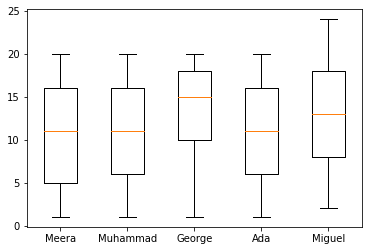

In [23]:
plt.boxplot(rolls_df.T, labels=rolls_df.index)
plt.show()

It's time to see if any of these differences are statistically significant. Given the differences in the box plots, we can't be certain that these samples meet homogeneity of variance, which precludes our using ANOVA. Instead, we can perform multiple t tests and adjust our significance threshold with the *Bonferroni* correction. Starting from $ \alpha_0 = .05$ and given that we have 5 hypotheses to test, we can set $ \alpha = \frac{.05}{5} = .01 $.

In [24]:
for name in rolls_df.index:
    print(name + ": ", ttest_ind(reference_rolls, rolls_df.loc[name]))

Meera:  Ttest_indResult(statistic=-0.6536712045982972, pvalue=0.5133274166015875)
Muhammad:  Ttest_indResult(statistic=-1.3154847579475373, pvalue=0.18835457697610083)
George:  Ttest_indResult(statistic=-63.68354263249204, pvalue=0.0)
Ada:  Ttest_indResult(statistic=-0.6463317696718339, pvalue=0.5180682257267395)
Miguel:  Ttest_indResult(statistic=-42.749219717097986, pvalue=0.0)


We've found our culprits: **George** and **Miguel**!
It seems like they might be using different approaches though. Let's find out more about the distributions of their trials using violin plots.

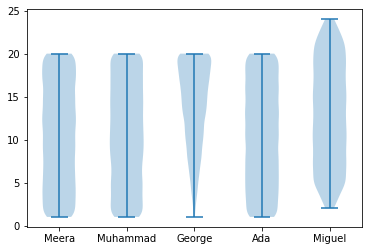

In [25]:
plt.violinplot(rolls_df.T)
plt.xticks(ticks=range(1, rolls_df.shape[0]+1), labels=rolls_df.index)
plt.show()

Those violin plots sure look different. Time to come up with and test a hypothesis for each of our cheaters.
Hints:
    - What does convolution do to a uniform distribution?
    - It could be useful to compare variances.
    - Getting to the bottom of Miguel's method may require a lot more trials.